In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset/weatherHistory.csv


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional


In [3]:
df = pd.read_csv('/kaggle/input/weather-dataset/weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
# Preprocessing
data = df['Temperature (C)'].values
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [9]:
# Create the training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [11]:
# Create the training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [12]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [14]:
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)


In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [16]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1726726140.770822     142 service.cc:145] XLA service 0x7b25a40083d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726726140.770883     142 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  77/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0050  

I0000 00:00:1726726141.541107     142 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.7957e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.9331e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8885e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.9253e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8350e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.1363e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8874e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.0180e-04
Epoch 10/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8029e-04
Epoch 11/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.0600e-04
Epoch 12/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8438e-04
Epoch 13/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8908e-04
Epoch 14/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss:

In [17]:
# Vanilla LSTM Model
vanilla_lstm_model = Sequential()
vanilla_lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
vanilla_lstm_model.add(Dense(1))
vanilla_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
vanilla_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0077
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 6.7693e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.1526e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.9933e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.9323e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.8925e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.8617e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.7049e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.6616e-04
Epoch 10/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5873e-04
Epoch 11/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5558e-04
Epoch 12/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5497e-04
Epoch 13/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.7296e-04
Epoch 14/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/

In [18]:
# Stacked LSTM Model
stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
stacked_lstm_model.add(LSTM(50, return_sequences=False))
stacked_lstm_model.add(Dense(1))
stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
stacked_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0081
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.3463e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.9334e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.0674e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.9272e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.5910e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6478e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.5674e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6011e-04
Epoch 13/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.4860e-04
Epoch 14/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.3501e-04
Epoch 15/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.4074e-04
Epoch 16/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.3372e-04
Epoch 17/20
2411/2411 ━━━━━━━━━━━━━━━━

In [19]:
# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(50, input_shape=(look_back, 1))))
bidirectional_lstm_model.add(Dense(1))
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bidirectional_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0072
Epoch 2/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 7.5503e-04
Epoch 3/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.3882e-04
Epoch 4/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.1119e-04
Epoch 5/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.9724e-04
Epoch 6/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.8686e-04
Epoch 7/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.7707e-04
Epoch 8/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.7866e-04
Epoch 9/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6491e-04
Epoch 10/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.5689e-04
Epoch 11/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6488e-04
Epoch 12/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.7315e-04
Epoch 13/20
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6215e-04
Epoch 14/20
2411/2411 ━━━━━━━━━━━━━━━━

In [21]:
# Predictions
rnn_predictions = rnn_model.predict(X_test)
vanilla_lstm_predictions = vanilla_lstm_model.predict(X_test)
stacked_lstm_predictions = stacked_lstm_model.predict(X_test)
bidirectional_lstm_predictions = bidirectional_lstm_model.predict(X_test)


603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
# Inverse transform predictions
rnn_predictions = scaler.inverse_transform(rnn_predictions)
vanilla_lstm_predictions = scaler.inverse_transform(vanilla_lstm_predictions)
stacked_lstm_predictions = scaler.inverse_transform(stacked_lstm_predictions)
bidirectional_lstm_predictions = scaler.inverse_transform(bidirectional_lstm_predictions)
y_test_inverse = scaler.inverse_transform([y_test])


In [24]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rmse, mape


In [25]:
rnn_mae, rnn_rmse, rnn_mape = evaluate_model(y_test_inverse[0], rnn_predictions[:, 0])
vanilla_lstm_mae, vanilla_lstm_rmse, vanilla_lstm_mape = evaluate_model(y_test_inverse[0], vanilla_lstm_predictions[:, 0])
stacked_lstm_mae, stacked_lstm_rmse, stacked_lstm_mape = evaluate_model(y_test_inverse[0], stacked_lstm_predictions[:, 0])
bidirectional_lstm_mae, bidirectional_lstm_rmse, bidirectional_lstm_mape = evaluate_model(y_test_inverse[0], bidirectional_lstm_predictions[:, 0])


In [26]:
# Print the metrics
print(f"RNN - MAE: {rnn_mae}, RMSE: {rnn_rmse}, MAPE: {rnn_mape}")
print(f"Vanilla LSTM - MAE: {vanilla_lstm_mae}, RMSE: {vanilla_lstm_rmse}, MAPE: {vanilla_lstm_mape}")
print(f"Stacked LSTM - MAE: {stacked_lstm_mae}, RMSE: {stacked_lstm_rmse}, MAPE: {stacked_lstm_mape}")
print(f"Bidirectional LSTM - MAE: {bidirectional_lstm_mae}, RMSE: {bidirectional_lstm_rmse}, MAPE: {bidirectional_lstm_mape}")


RNN - MAE: 749.8640783863693, RMSE: 904.3924788789184, MAPE: 107712271009243.19
Vanilla LSTM - MAE: 738.6827237932243, RMSE: 893.8264204133988, MAPE: 110550317621270.61
Stacked LSTM - MAE: 747.0713996048136, RMSE: 904.0360118010924, MAPE: 123001693574616.11
Bidirectional LSTM - MAE: 743.9454263092078, RMSE: 903.0501412974005, MAPE: 135501532263713.28


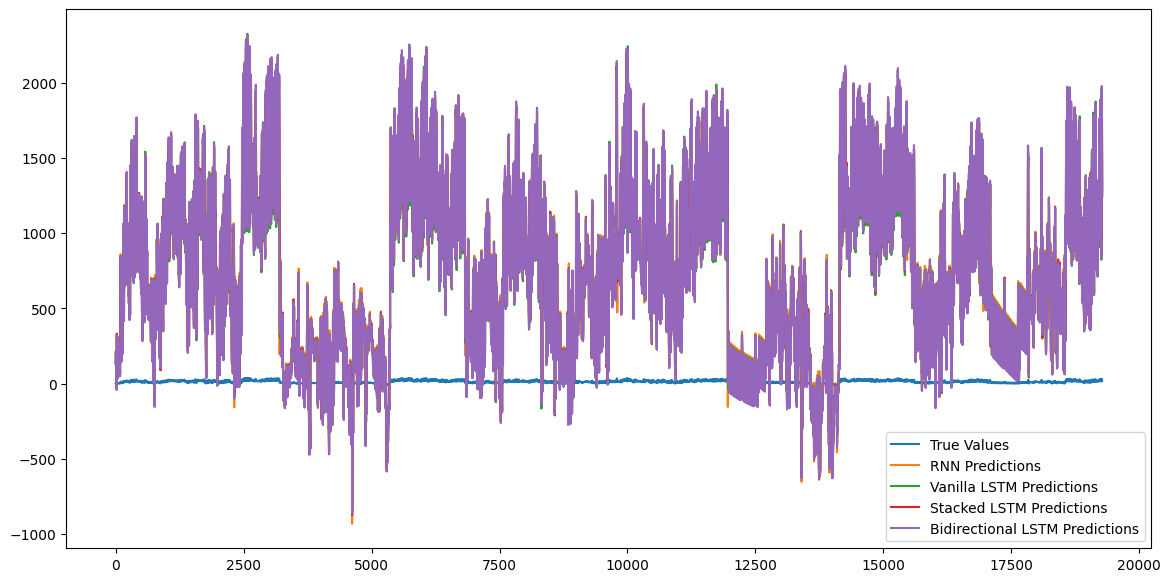

In [27]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test_inverse[0], label='True Values')
plt.plot(rnn_predictions[:,0], label='RNN Predictions')
plt.plot(vanilla_lstm_predictions[:,0], label='Vanilla LSTM Predictions')
plt.plot(stacked_lstm_predictions[:,0], label='Stacked LSTM Predictions')
plt.plot(bidirectional_lstm_predictions[:,0], label='Bidirectional LSTM Predictions')
plt.legend()
plt.show()